[[2104.0, 3.0], [1600.0, 3.0], [2400.0, 3.0], [1416.0, 2.0], [3000.0, 4.0], [1985.0, 4.0], [1534.0, 3.0], [1427.0, 3.0], [1380.0, 3.0], [1494.0, 3.0]]
[399900.0, 329900.0, 369000.0, 232000.0, 539900.0, 299900.0, 314900.0, 198999.0, 212000.0, 242500.0]


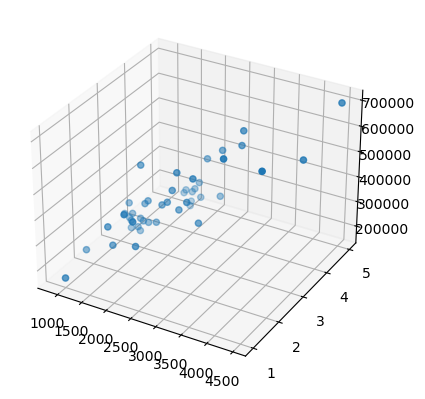

In [2]:
import numpy as np
import matplotlib.pyplot as plt

file = open("./ex1data2.txt")
datas = file.readlines()
data_count = len(datas)
tx = []
ty = []
# 获取数据
for i in range(data_count):
    tx.append([float(datas[i].split(',')[0]), float(datas[i].split(',')[1])])
    ty.append(float(datas[i].split(',')[2]))
print(tx[0:10])
print(ty[0:10])
# 绘图
ax = plt.subplot(projection='3d')
ax.scatter([tx[i][0] for i in range(len(tx))], [tx[i][1] for i in range(len(tx))], [ty[i] for i in range(len(tx))])
plt.show()

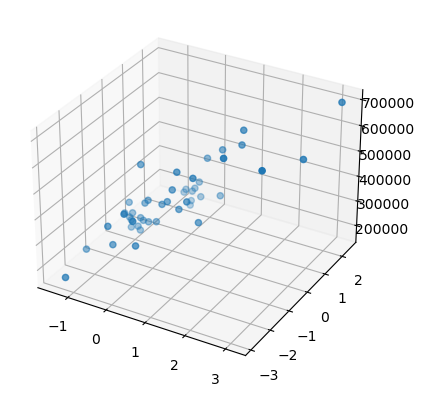

In [3]:
# 任务一 : 特征值缩放 归一化
# 先将数组矩阵化
x = np.matrix(tx, dtype=float)
# 特征值缩放 : (x[i] - 平均值 ) / x 的 标准差
x[:, 0] = (x[:, 0] - np.mean(x[:, 0])) / np.std(x[:, 0])
x[:, 1] = (x[:, 1] - np.mean(x[:, 1])) / np.std(x[:, 1])
y = np.matrix(ty, dtype=float).T
# 查看图像
ax = plt.subplot(projection='3d')
ax.scatter(x[:, 0], x[:, 1], y[:, 0])
plt.show()
# 插入常数 1
x = np.insert(x, 0, np.ones(x.shape[0]), 1)

In [4]:
#定义预测函数
def h_theta(x, theta):
    return x * theta


#定义损失函数
def j_theta(x, theta, y):
    return np.sum(np.power(y - h_theta(x, theta), 2)) / (2 * len(x))

In [5]:
#开始梯度下降
iterations = 50  #学习次数
rate = 0.1  # 学习速度
#初始学习参数
theta = np.matrix([0, 0, 0], dtype=float).T
print(j_theta(x, theta, y))
last_j = 0
j_his = []
for i in range(iterations):
    tmpSum = h_theta(x, theta) - y
    # print(tmpSum)
    last_j = j_theta(x, theta, y)
    j_his.append(last_j)
    theta = theta - (rate / len(x)) * x.T @  (h_theta(x, theta) - y)
    # for j in range(3):
    #     theta[j, 0] -= rate * np.sum(np.multiply(tmpSum, x[:, j])) / len(x)
        # print(np.sum(np.multiply(tmpSum, x[:, j])))
    # print(theta)

print(last_j)
# print(j_his)

65591548106.45744
2063179931.329474


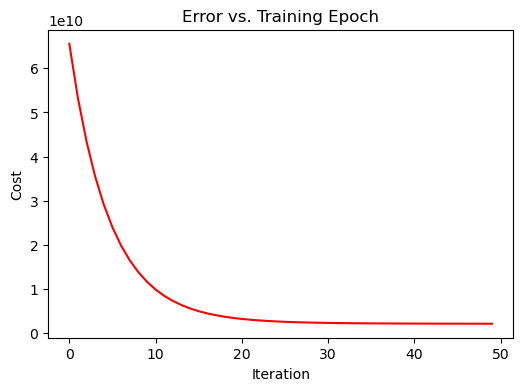

In [6]:
#画出随着迭代次数变化的损失值
fig2, ax = plt.subplots(figsize=(6, 4))
ax.plot(np.arange(iterations), j_his, 'r')
ax.set_xlabel('Iteration')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

In [7]:
#正规方程法
normal_equations_theta = np.linalg.inv(x.T @ x) @ x.T @ y
print(normal_equations_theta)
print(j_theta(x,theta,y))

[[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]]
2061269629.2461312
